In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score, precision_score

In [56]:
def run_model(model, alg_name, plot_index):
    # build the model on training data
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)* 100
    conf_mat = confusion_matrix(y_test, y_pred)

    Mismatch = (y_test != y_pred)
    
    print(conf_mat)
    print('\n')
    #print(f1)
    
    # Compare the prediction result with ground truth
    Color_codes = np.array([[150,150,150], [203,24,29], [0, 0, 255]]) 

    # plt.figure(plot_index)
    ax = fig.add_subplot(4,2,plot_index) 
 
    # plotting all the Ductility vs Creep_Rate state-space with 's' indicating the value of damage
    ax.scatter(X_test['Ductility'], X_test['Creep_Rate'], color=Color_codes[0,:]/255.0, s = MCS_Res_Target['Damage']*200, marker='.', label='Circle = Ground truth')
    # superimposing the misclassified points
    ax.scatter(X_test['Ductility'][Mismatch], X_test['Creep_Rate'][Mismatch], color=Color_codes[1,:]/255.0, s = MCS_Res_Target['Damage'][Mismatch]*200, marker='x', label='Cross = Prediction')

#     ax.legend(loc="lower right")
#     # manually set legend color to black
#     leg = plt.gca().get_legend()
#     leg.legendHandles[0].set_color('black')
#     leg.legendHandles[1].set_color('black')
#     leg.legendHandles[1].set_facecolors('none')

    ax.set_title(alg_name + ". Accuracy: " + str(accuracy))

In [57]:
def Compare_Classifiers(X_train, X_test, y_train, y_test):

    fig = plt.figure(figsize=(15,20))

    # ---- Decision Tree -----------
    from sklearn import tree

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
    run_model(model, "Decision Tree", 1)

    # ----- Random Forest ---------------
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_estimators=10)
    run_model(model, "Random Forest", 2)

    # ----- xgboost ------------
    # install xgboost
    # 'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079

    from xgboost import XGBClassifier

    model = XGBClassifier()
    run_model(model, "XGBoost", 3)

    # ------ SVM Classifier ----------------
    from sklearn.svm import SVC
    model = SVC()
    run_model(model, "SVM Classifier", 4)

    # -------- Nearest Neighbors ----------
    from sklearn import neighbors
    model = neighbors.KNeighborsClassifier(n_neighbors=2)
    run_model(model, "Nearest Neighbors Classifier", 5)

    # ---------- SGD Classifier -----------------
    from sklearn.linear_model import SGDClassifier
    from sklearn.multiclass import OneVsRestClassifier

    model = OneVsRestClassifier(SGDClassifier())
    run_model(model, "SGD Classifier", 6)

    # --------- Gaussian Naive Bayes ---------
    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()
    run_model(model, "Gaussian Naive Bayes", 7)

    # ----------- Neural network - Multi-layer Perceptron  ------------
    from sklearn.neural_network import MLPClassifier

    model = MLPClassifier()
    run_model(model, " MLP Neural network ", 8)


    fig.show()

In [66]:
col_names = ['Damage','Ductility','Creep_Rate','Zeta_P', 'A', 'S_y', 
'Alpha', 'C_f', 'Sigma_B', 'Sigma_SU', 'Sigma_RT', 'T_SU', 'T_RT', 'T_SO', 'Sigma_SO']

MCS_Res_Base = pd.read_csv('MCS_50000_Tube_29_D_LHC.csv', 
                           index_col = False, names = col_names)
MCS_Res_Target = pd.read_csv('MCS_50000_Tube_29_D_LHC.csv', 
                             index_col = False, names = col_names)

Failure_Limit = 1 # When modelling creep-fatigue damage, a value >= 1 implies failure (or more specifically the formation of a shallow crack)

# Setting what features to include 
features = ['Ductility','Creep_Rate', 'A', 'S_y', 'Alpha', 'C_f']
#features = ['Ductility','Creep_Rate']

# Training data
Nb = len(MCS_Res_Base['Damage']) # Number of bins in the latin-hypercube
X_train = MCS_Res_Base[features]/Nb
y_train = (MCS_Res_Base['Damage'] >= Failure_Limit)

# Testing data
Nb = len(MCS_Res_Target['Damage']) # Number of bins in the latin-hypercube
X_test = MCS_Res_Target[features]/Nb
y_test = (MCS_Res_Target['Damage'] >= Failure_Limit)

print(sum(y_train))
print(sum(y_test))


49
49


C:\Users\nz9512\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


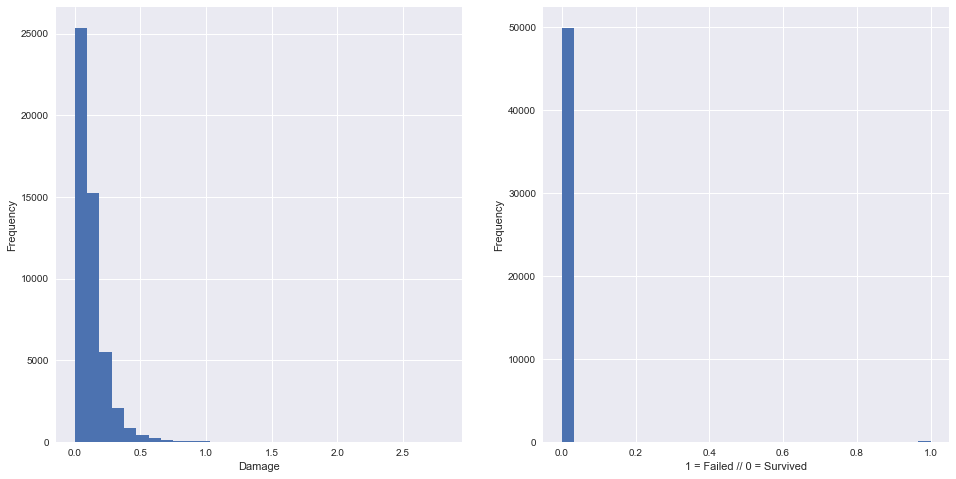

In [67]:
fig = plt.figure(figsize=(16,8))
# Histogram of the values of damage in the training data
ax = fig.add_subplot(1,2,1)
MCS_Res_Base['Damage'].hist(bins = 30)
plt.xlabel("Damage")
plt.ylabel("Frequency")
# Histogram of the number of failures (as defined by 'Failure_Limit') in the training data 
ax = fig.add_subplot(1,2,2)
y_train.hist(bins = 30)
plt.xlabel("1 = Failed // 0 = Survived")
plt.ylabel("Frequency")
fig.show()

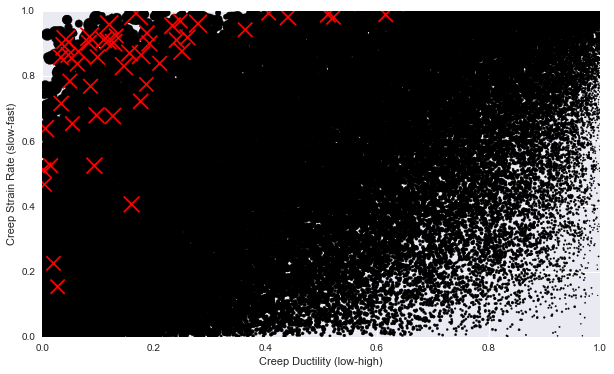

In [68]:
plt.figure(figsize= (10,6))
plt.scatter(X_train['Ductility'],
            X_train['Creep_Rate'],
            color = 'k',
            s = (MCS_Res_Base['Damage']*200))
plt.scatter(X_train['Ductility'][y_train],
            X_train['Creep_Rate'][y_train],
            color = 'r',
            marker = 'x',
            s = (MCS_Res_Base['Damage'][y_train]*200))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Creep Ductility (low-high)')
plt.ylabel('Creep Strain Rate (slow-fast)')
plt.show()

In [69]:
# Run the comparison between classifers
Compare_Classifiers(X_train, X_test, y_train, y_test)

[[49951     0]
 [   44     5]]


[[49951     0]
 [   15    34]]




C:\Users\nz9512\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[49951     0]
 [   49     0]]


[[49951     0]
 [   49     0]]


[[49951     0]
 [   48     1]]




C:\Users\nz9512\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[49951     0]
 [   49     0]]


[[49951     0]
 [   49     0]]


[[49951     0]
 [   49     0]]




C:\Users\nz9512\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
